# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 02: Extracción y Revisión de Datos</center></h1>

Esta actividad busca aplicar lo que acabamos de ver en clases sobre extracción de datos y conectarlo con la materia de "Tipos de Datos" que hemos visto en las clases pasadas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 02 en Canvas.</b>

Para esta actividad deben hacer lo siguiente:
<ol>
<li>Extraer datos</li>

Para esta actividad usaremos [**PokeAPI**](https://pokeapi.co/about), una interfaz de código abierto con información detallada relacionada a los videojuegos de Pokémon.
    
En esta actividad nos concentraremos en comparar las características básicas de los 151 pokémon originales. Para obtener la información de un pokémon, utilizaremos el siguiente URL:

```
https://pokeapi.co/api/v2/pokemon/{id_pokemon}
```

Donde `{id_pokemon}` es el identificador del pokémon (un número entero). 
    
<br>

<li>Formato</li>

¿En qué formato están los datos descargados? Identifique si son datos estructurados, semi-estructurados o no estructurados, explicando claramente por qué los categoriza así.

<br>
    
<li>DataFrame de análisis</li>

Construya un DataFrame con al menos las siguientes columnas: `name, type1, type2, hp, attack, defense, special-attack, special-defense, speed`. En caso de que un pokémon tenga solo un tipo, puede dejar su atributo `type2 = None`. Guarde este nuevo set de datos en un archivo CSV.

**Hint:** Inspeccione el atributo `stats` y `types` de las respuestas obtenidas. El valor que debe almacenar en el DataFrame estará bajó el nombre `base_stat`.
    
<br>
    
<li>Preguntas</li>

A partir de su nuevo dataset, responda las siguientes preguntas:

4.1 ¿Cuál son los 3 tipos (fuego, agua, tierra, etc.) más comunes en los pokémones de la primera generación?
    
4.2 ¿Cuál es el pokémon más rápido? ¿Y el más lento?

4.3 Genere una nueva columna en el DataFrame llamada `total-stats` que consista en la suma de todos los stats de un pokémon (`hp, attack, defense, special-attack, special-defense, speed`) y grafique un histograma de esta nueva variable. ¿Cuál es el rango de valores

## Rúbrica

- Si han hecho todo y sólo hay errores menores: 7.0
- Si sólo llegaron hasta la parte 3: 5.0
- Menos que eso: 1.0

## 1. Extraer datos

Utilizando el URL indicado en el enunciado, obtenga la información de los primeros 151 pokémones y guárdelos en una lista llamada `pokemones`. 

Para ello debe usar un `for` que itere sobre los diferentes IDs de pokemon y rescate la información de cada uno de ellos, concatenándola en una lista. Antes de iterar sobre los 151 pokemones, pruebe con 1 o 2 y una vez que verifique que su código está funcionando, aplique a los 151 primeros pokemones.

In [ ]:
import requests
import pandas as pd

pokemones = []

for id_pokemon in range(1, 152):  # 1 a 151
    url = f"https://pokeapi.co/api/v2/pokemon/{id_pokemon}"
    resp = requests.get(url)
    
    if resp.status_code == 200:
        data = resp.json()
        
        # Tipos (pueden ser 1 o 2)
        types = [t["type"]["name"] for t in data["types"]]
        type1 = types[0] if len(types) > 0 else None
        type2 = types[1] if len(types) > 1 else None
        
        # Stats (PokéAPI devuelve en orden: hp, attack, defense, sp.atk, sp.def, speed)
        stats = {s["stat"]["name"]: s["base_stat"] for s in data["stats"]}
        
        pokemon = {
            "name": data["name"],
            "type1": type1,
            "type2": type2,
            "hp": stats["hp"],
            "attack": stats["attack"],
            "defense": stats["defense"],
            "special-attack": stats["special-attack"],
            "special-defense": stats["special-defense"],
            "speed": stats["speed"]
        }
        pokemones.append(pokemon)
    else:
        print(f"Error con Pokémon {id_pokemon}")

# Convertir a DataFrame
df = pd.DataFrame(pokemones)


         name  type1   type2  hp  attack  defense  special-attack  \
0   bulbasaur  grass  poison  45      49       49              65   
1     ivysaur  grass  poison  60      62       63              80   
2    venusaur  grass  poison  80      82       83             100   
3  charmander   fire    None  39      52       43              60   
4  charmeleon   fire    None  58      64       58              80   

   special-defense  speed  
0               65     45  
1               80     60  
2              100     80  
3               50     65  
4               65     80  


In [2]:
df.head()

,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed
0,bulbasaur,grass,poison,45,49,49,65,65,45
1,ivysaur,grass,poison,60,62,63,80,80,60
2,venusaur,grass,poison,80,82,83,100,100,80
3,charmander,fire,None,39,52,43,60,50,65
4,charmeleon,fire,None,58,64,58,80,65,80


## 2. Formato de datos

Revise la lista que almacenó en `pokemones` y coméntenos en qué formato están los datos y qué tipos de datos serían estos (estructurados, semi-estructurados, no estructurados).

Respuesta:

Esta en formato JSON, es decir, semi - estructurado

## 3. DataFrame de análisis

Construya ahor un DataFrame para poder analizar los datos posteriormente. Revise las columnas mínimas que debe tener según el enunciado inicial.

In [3]:
df


,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed
0,bulbasaur,grass,poison,45,49,49,65,65,45
1,ivysaur,grass,poison,60,62,63,80,80,60
2,venusaur,grass,poison,80,82,83,100,100,80
3,charmander,fire,None,39,52,43,60,50,65
4,charmeleon,fire,None,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...
146,dratini,dragon,None,41,64,45,50,50,50
147,dragonair,dragon,None,61,84,65,70,70,70
148,dragonite,dragon,flying,91,134,95,100,100,80
149,mewtwo,psychic,None,106,110,90,154,90,130


## 4. Preguntas

#### 4.1 ¿Cuál son los 3 tipos (*water, fire, ground,* etc.) más comunes en los pokémones de la primera generación?

In [ ]:
df['type1'].value_counts()
# Los 3tipos mas comunes son water, normal y poison

type1
water       28
normal      22
poison      14
grass       12
fire        12
bug         12
electric     9
rock         9
ground       8
psychic      8
fighting     7
ghost        3
dragon       3
fairy        2
ice          2
Name: count, dtype: int64

El tipo más común es:
    _Water_

#### 4.2 ¿Cuál es el pokémon más rápido? ¿Y el más lento?

In [ ]:
df.sort_values(by=['speed'])

,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed
78,slowpoke,water,psychic,90,65,65,40,40,15
38,jigglypuff,normal,fairy,115,45,20,45,25,20
73,geodude,rock,ground,40,80,100,30,30,20
45,paras,bug,grass,35,70,55,45,55,25
110,rhyhorn,ground,rock,80,85,95,30,30,25
...,...,...,...,...,...,...,...,...,...
50,dugtrio,ground,None,35,100,50,50,70,120
141,aerodactyl,rock,flying,80,105,65,60,75,130
134,jolteon,electric,None,65,65,60,110,95,130
149,mewtwo,psychic,None,106,110,90,154,90,130


El pokémon más rápido es:
    _electrode_ y el mas lento es _slowpoke_

#### 4.3 Genere una nueva columna en el DataFrame llamada `total-stats` que consista en la suma de todos los stats de un pokémon (`hp, attack, defense, special-attack, special-defense, speed`) ¿Cuáles son los valores mínimo y máximo de esta nueva variable?

In [9]:
data_total = df.copy()
data_total['total-stats'] = data_total['hp'] + data_total['attack'] + data_total['defense'] + data_total['special-attack'] + data_total['special-defense'] + data_total['speed']
data_total.sort_values(by='total-stats')

,name,type1,type2,hp,attack,defense,special-attack,special-defense,speed,total-stats
9,caterpie,bug,None,45,30,35,20,20,45,195
12,weedle,bug,poison,40,35,30,20,20,50,195
128,magikarp,water,None,20,10,55,15,20,80,200
10,metapod,bug,None,50,20,55,25,25,30,205
13,kakuna,bug,poison,45,25,50,25,25,35,205
...,...,...,...,...,...,...,...,...,...,...
144,zapdos,electric,flying,90,90,85,125,90,100,580
145,moltres,fire,flying,90,100,90,125,85,90,580
148,dragonite,dragon,flying,91,134,95,100,100,80,600
150,mew,psychic,None,100,100,100,100,100,100,600


El valor máximo lo tiene: _mewtwo_

y el mínimo lo tiene: _caterpie_

#### 4.4 Grafique un histograma de `total-stats` y comente brevemente lo que observa de la distribución de este atributo.

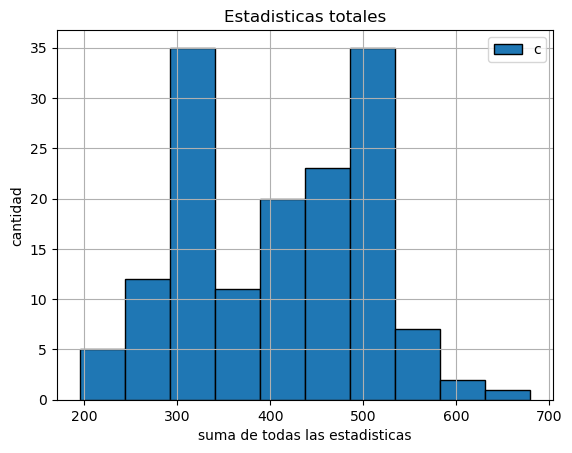

In [30]:
import matplotlib.pyplot as plt
plt.hist(data_total['total-stats'], bins=10, edgecolor='black')
plt.title('Estadisticas totales')
plt.xlabel('suma de todas las estadisticas')
plt.ylabel('cantidad')
plt.grid(True)
plt.legend('cant. Pokemon')

Descripción: